In questo notebook, viene svolto il task di Data Understanding esclusivamente sul dataset povertyByStateYear.csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_type import povertyImprovment

**Analisi tipo e null value**

In [2]:
df = pd.read_csv("../../data/povertyByStateYear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


**Presenza duplicati**

In [3]:
df.duplicated().sum()

0

**Stati mancanti o in eccesso**

In [4]:
df.groupby("year").count()

,state,povertyPercentage
year,,
2004,52,52
2005,52,52
2006,52,52
2007,52,52
2008,52,52
2009,53,53
2010,51,51
2011,52,52
2012,52,0


In [5]:
#Il 2010 non contiene lo stato Wyoming
s1 = set(df[df.year == 2004].state.unique())
s2 = set(df[df.year == 2010].state.unique())
set(s1-s2)

{'Wyoming'}

In [6]:
#Il 2009 contiene due volte lo stato Wyoming
df[df.year == 2009].groupby("state").size().sort_values(ascending=False)

state
Wyoming                 2
Alabama                 1
Arizona                 1
Alaska                  1
California              1
Colorado                1
Connecticut             1
Delaware                1
District of Columbia    1
Florida                 1
Georgia                 1
Hawaii                  1
Idaho                   1
Illinois                1
Indiana                 1
Iowa                    1
Kansas                  1
Kentucky                1
Louisiana               1
Arkansas                1
Maine                   1
Maryland                1
Michigan                1
Massachusetts           1
Mississippi             1
Missouri                1
Montana                 1
Minnesota               1
Nevada                  1
New Hampshire           1
New Jersey              1
New Mexico              1
New York                1
North Carolina          1
North Dakota            1
Nebraska                1
Ohio                    1
Oklahoma                1
Pennsy

**Null value per anno**

In [7]:
# Calcola il numero totale di valori per anno
total_values = df.groupby('year').size()

# Calcola il numero di valori nulli per anno
null_values = df[df['povertyPercentage'].isnull()].groupby('year').size()

# Calcola la percentuale di valori nulli per anno
null_percentage = (null_values / total_values) * 100

# Stampa i risultati
print("Numero di valori nulli per anno:")
print(null_values)
print("\nPercentuale di valori nulli per anno:")
print(null_percentage)

Numero di valori nulli per anno:
year
2012    52
dtype: int64

Percentuale di valori nulli per anno:
year
2004      NaN
2005      NaN
2006      NaN
2007      NaN
2008      NaN
2009      NaN
2010      NaN
2011      NaN
2012    100.0
2013      NaN
2014      NaN
2015      NaN
2016      NaN
2017      NaN
2018      NaN
2019      NaN
2020      NaN
dtype: float64


### Data understanding dopo la fase di data preparation

**Poverty Percentage Distribution**

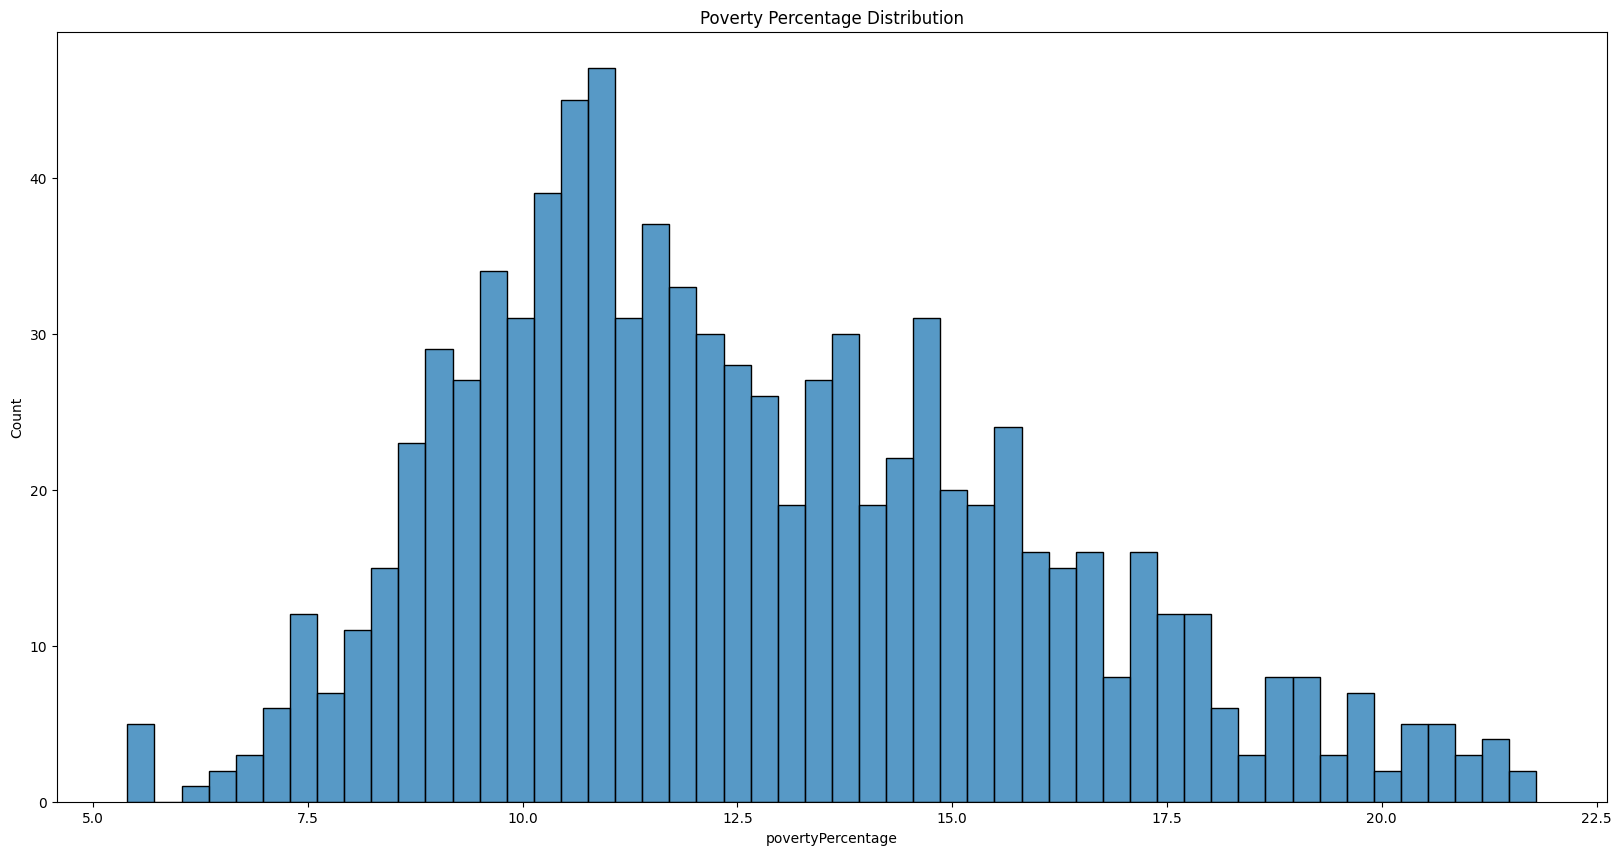

In [8]:
df = povertyImprovment()

plt.figure(figsize=(20, 10))
sns.histplot(x='povertyPercentage', bins=df.state.nunique(), data=df)
plt.title('Poverty Percentage Distribution')
plt.show()

**Mean Poverty Percentage**

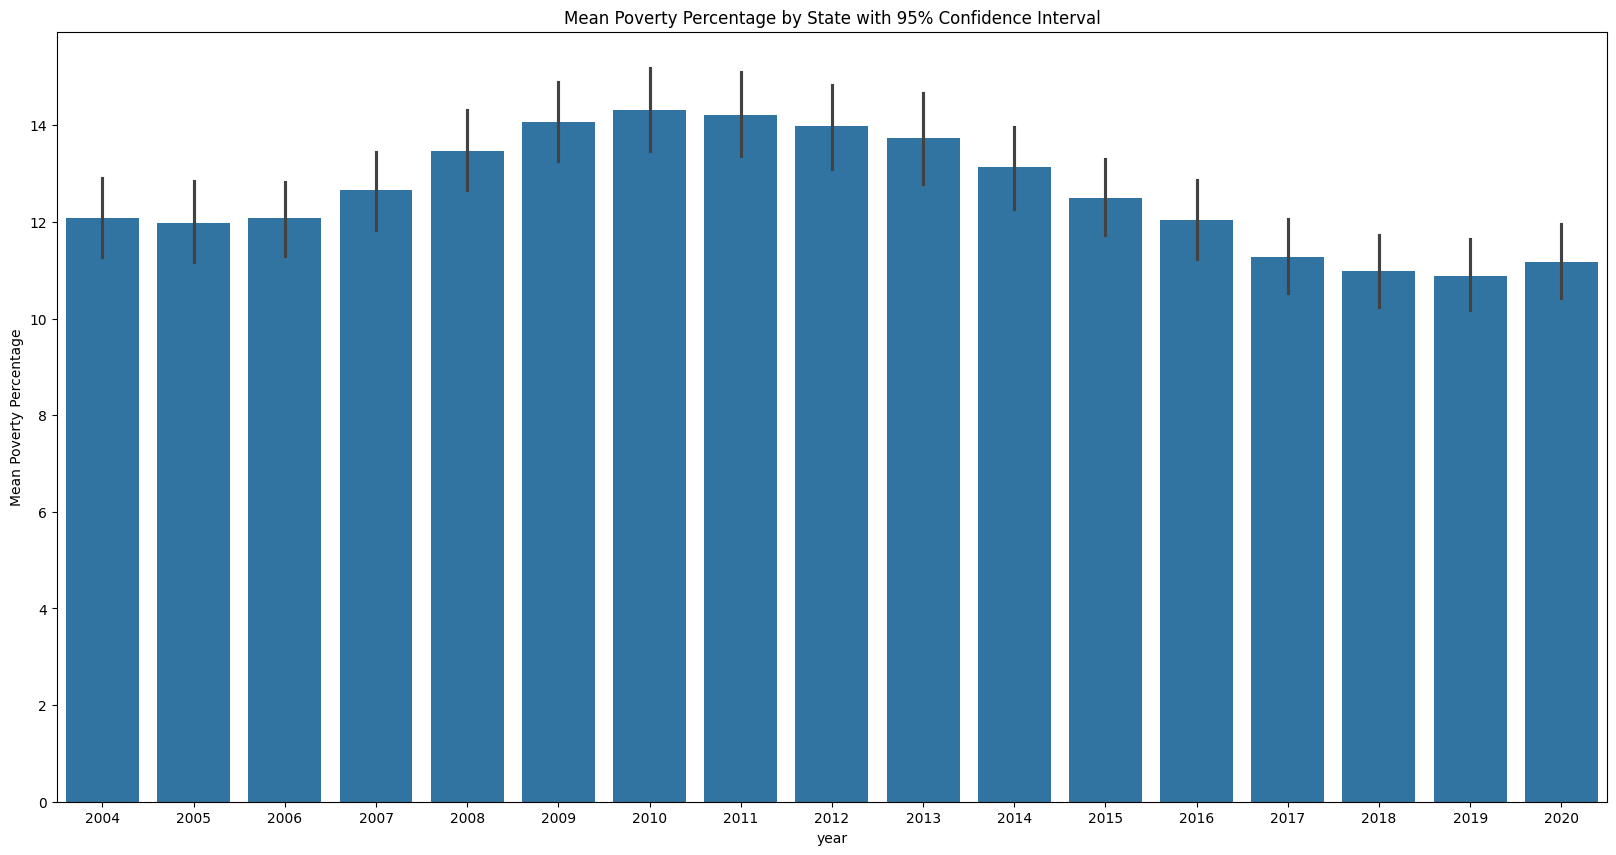

In [9]:
df = povertyImprovment()

plt.figure(figsize=(20, 10))
plt.title('Mean Poverty Percentage by State with 95% Confidence Interval')
sns.barplot(x="year", y="povertyPercentage", data=df, errorbar=('ci', 95))
plt.ylabel('Mean Poverty Percentage')
plt.show()

**Distribuzione per stato**

Text(0.5, 0, 'Poverty Percentage')

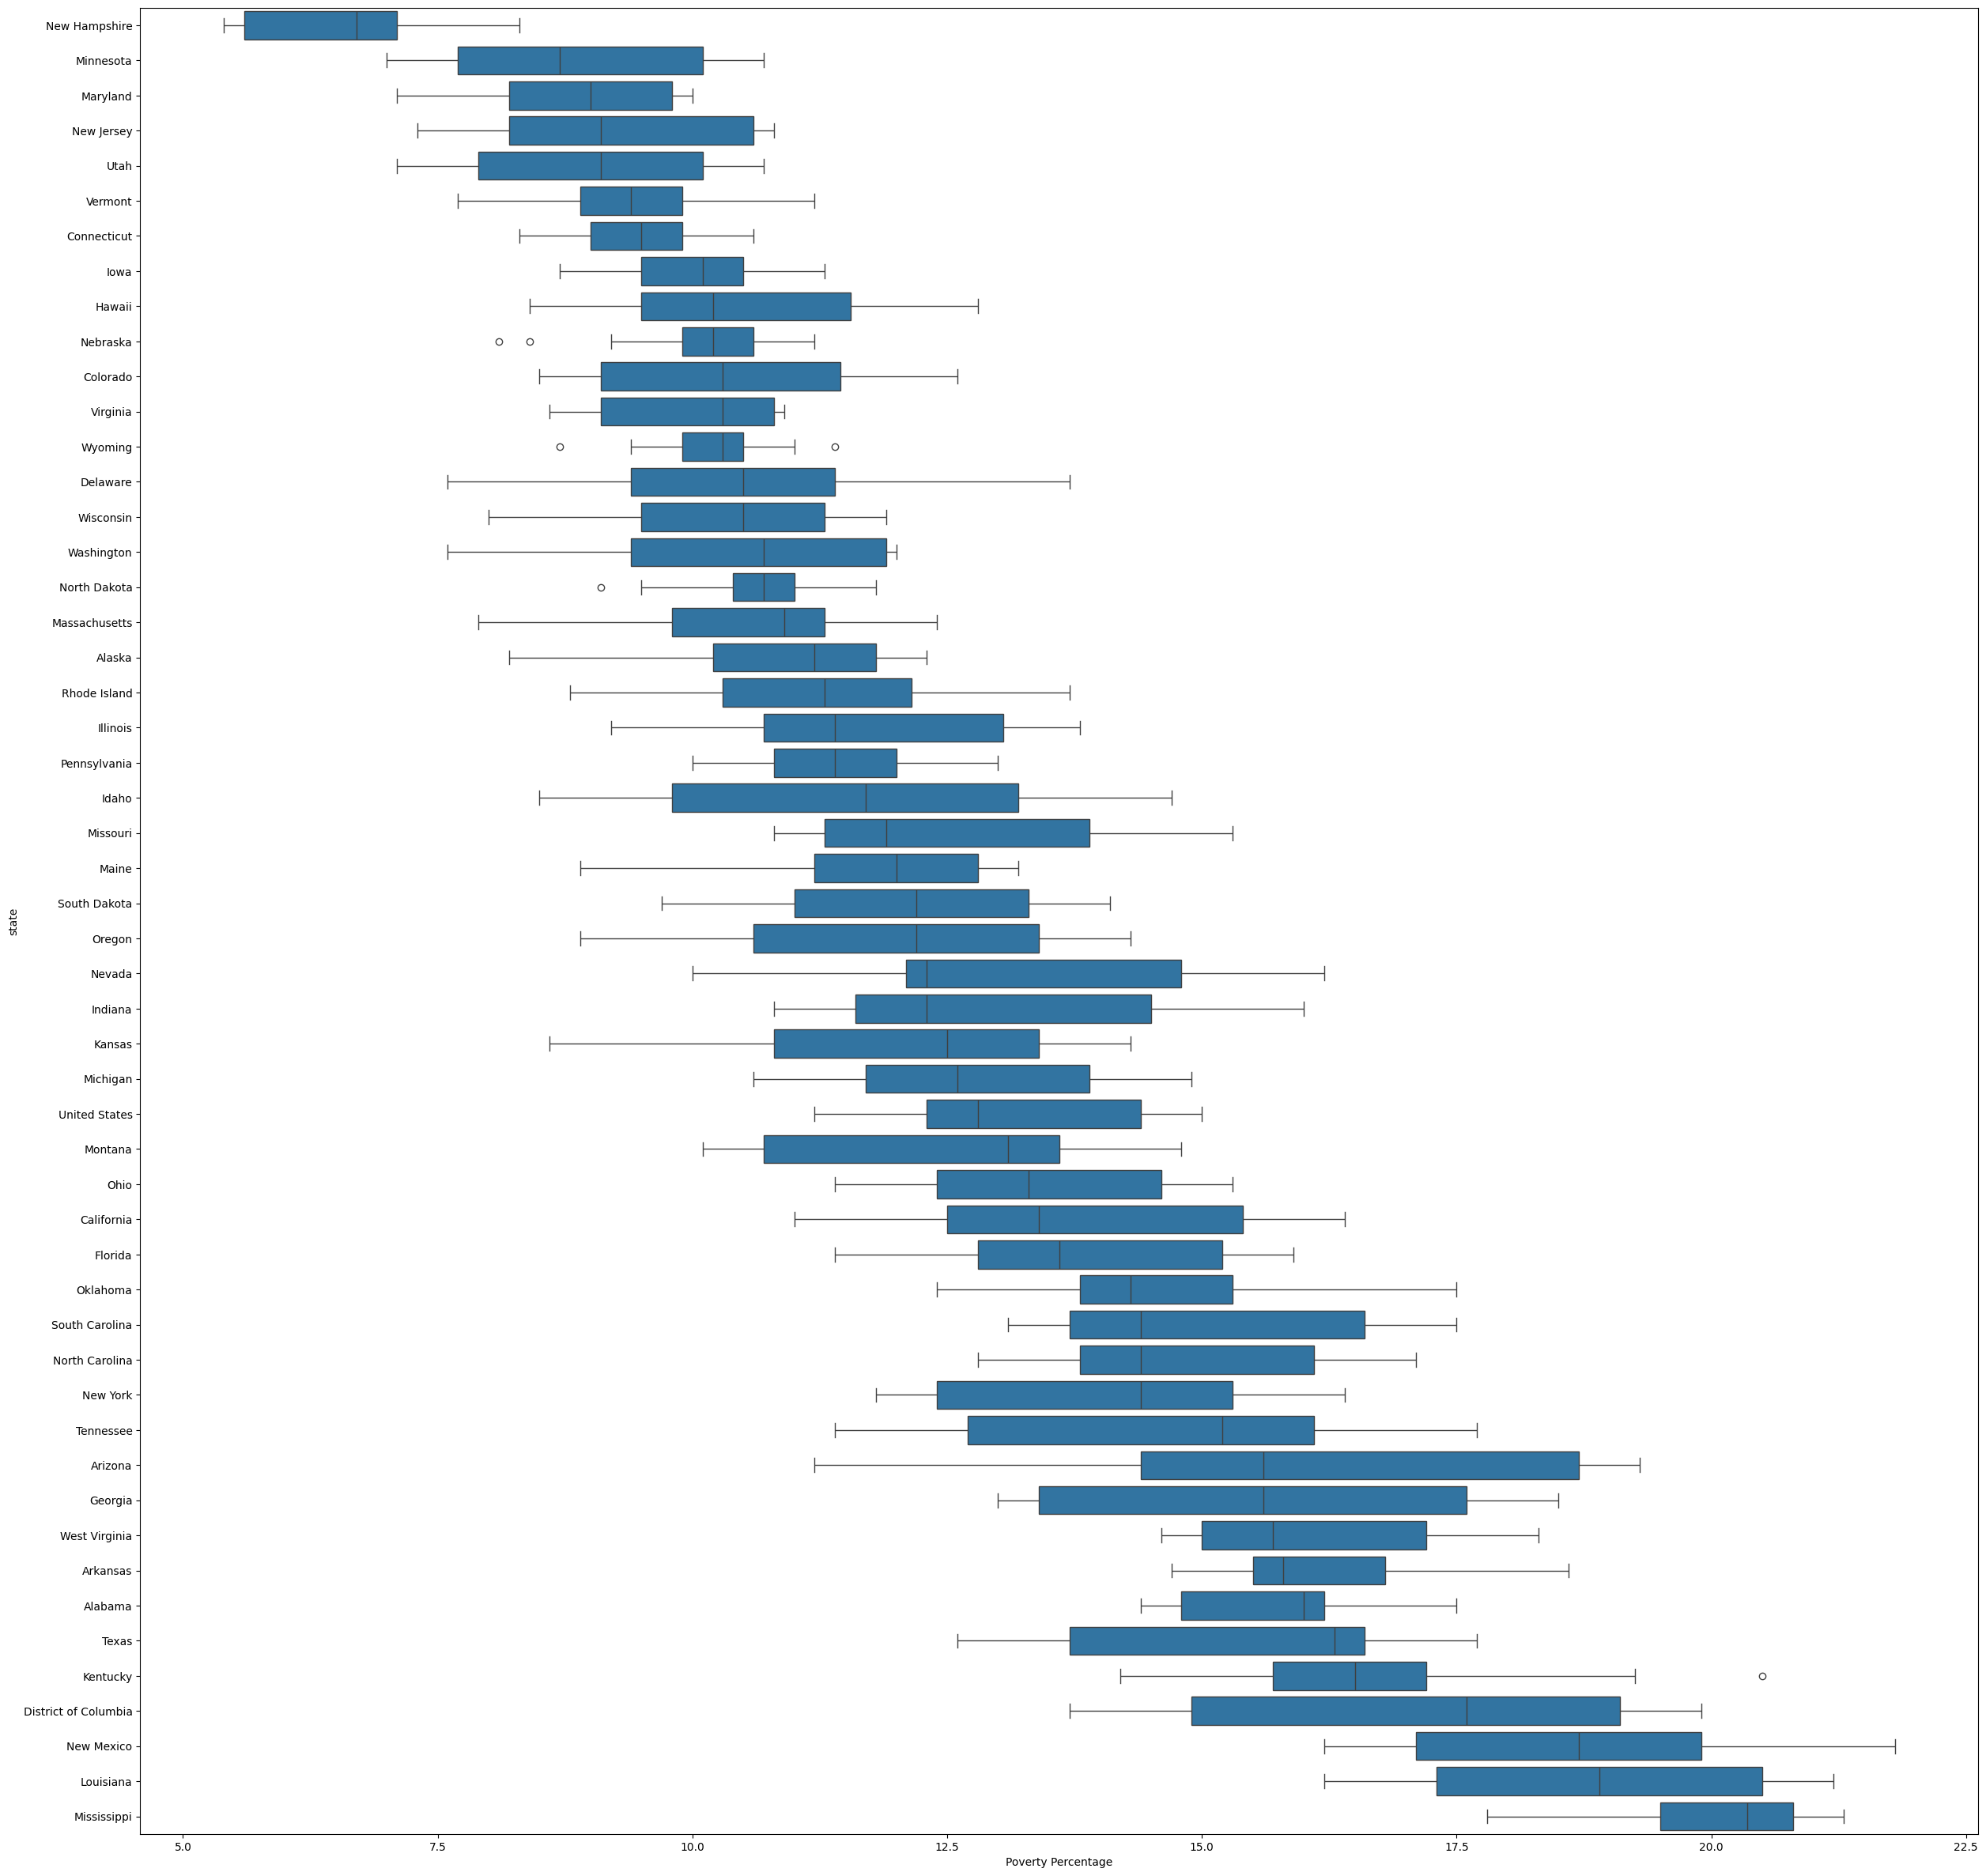

In [10]:
df = povertyImprovment()

# Calcola la mediana per ogni stato
medians = df.groupby(['state'])['povertyPercentage'].median().sort_values()

# Crea un boxplot ordinato in base alla mediana
plt.figure(figsize=(30, 30))
sns.boxplot(x=df['povertyPercentage'], y=df['state'], order=medians.index)
plt.xlabel('Poverty Percentage')

**Mean Poverty Percentage by State**

Text(0, 0.5, 'Average Poverty (%)')

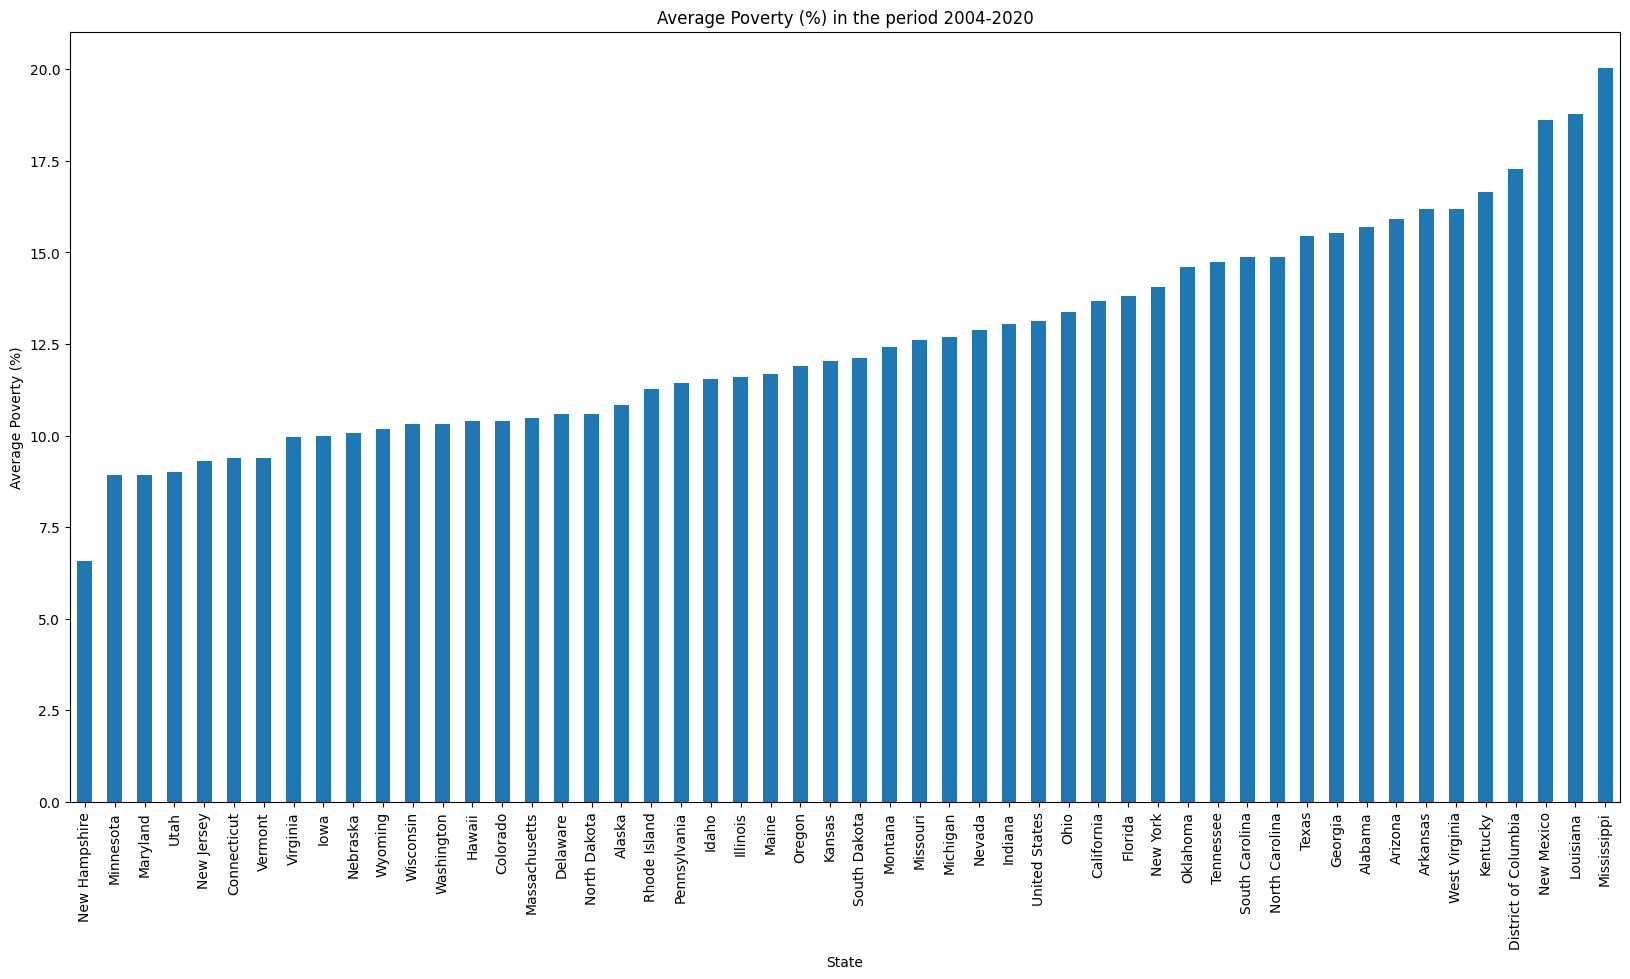

In [13]:
df.groupby(['state'])['povertyPercentage'].mean().sort_values().plot(kind='bar', figsize=(20, 10))
plt.title(f'Average Poverty (%) in the period {df.year.min()}-{df.year.max()}')
plt.xlabel('State')
plt.ylabel('Average Poverty (%)')